#### Загрузка набора данных

In [2]:
import pandas as pd

from sklearn import set_config

set_config(transform_output="pandas")

random_state=9

df = pd.read_csv("data/kc_house_data.csv", index_col="id")

df

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   
...                     ...       ...       ...        ...          ...   
263000018   20140521T000000  360000.0         3       2.50         1530   
6600060120  20150223T000000  400000.0         4       2.50         2310   
1523300141  20140623T000000  402101.0         2       0.75         1020   
291310100   20150116T000000  400000.0         3       2.50         1600   
1523300157  20141015T000000  325000.0         2       0.75         1020   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        1050   
1954400510      8080     1.0           0     0          3      8        1680   
...              ...     ...         ...   ...        ...    ...         ...   
263000018       1131     3.0           0     0          3      8        1530   
6600060120      5813     2.0           0     0          3      8        2310   
1523300141      1350     2.0           0     0          3      7        1020   
291310100       2388     2.0           0     0          3      8        1600   
1523300157      1076     2.0           0     0          3      7        1020   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   
...                   ...       ...           ...      ...      ...      ...   
263000018               0      2009             0    98103  47.6993 -122.346   
6600060120              0      2014             0    98146  47.5107 -122.362   
1523300141              0      2009             0    98144  47.5944 -122.299   
291310100               0      2004             0    98027  47.5345 -122.069   
1523300157              0      2008             0    98144  47.5941 -122.299   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503  
...                   ...         ...  
263000018            1530        1509  
6600060120           1830        7200  
1523300141           1020        2007  
291310100            1410        1287  
1523300157           1020        1357  

[21613 rows x 20 columns]

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- waterfront

In [3]:
from utils import split_stratified_into_train_val_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df,
    stratify_colname="waterfront",
    frac_train=0.80,
    frac_val=0,
    frac_test=0.20,
    random_state=random_state,
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
3046200125  20150406T000000  202000.0         2       1.00          740   
1853000030  20150416T000000  775000.0         3       2.50         3550   
1825079005  20140609T000000  739000.0         4       2.50         2800   
2523039315  20141022T000000  481000.0         3       2.00         2580   
6623400246  20140523T000000  200000.0         4       1.00         1350   
...                     ...       ...       ...        ...          ...   
2523069134  20150406T000000  495000.0         4       2.50         2480   
1931300412  20150416T000000  475000.0         3       2.25         1190   
4331000400  20150220T000000  252000.0         3       1.50         1150   
9212900180  20140625T000000  760000.0         4       2.50         2760   
7000100775  20140721T000000  625000.0         3       2.00         1730   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
3046200125      6550     1.0           0     0          4      5         740   
1853000030     32807     2.0           0     0          3      9        3550   
1825079005    246114     2.0           0     0          3      9        2800   
2523039315     15653     1.5           0     0          3      9        2580   
6623400246     11507     1.0           0     0          3      7        1350   
...              ...     ...         ...   ...        ...    ...         ...   
2523069134     91911     1.0           0     2          4      7        1470   
1931300412      1200     3.0           0     0          3      8        1190   
4331000400     13200     1.0           0     0          3      7        1150   
9212900180      6000     2.0           0     0          5      7        2230   
7000100775     12219     1.0           0     0          4      7        1730   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
3046200125              0      1946             0    98168  47.4807 -122.332   
1853000030              0      1989             0    98077  47.7292 -122.082   
1825079005              0      1999             0    98014  47.6586 -121.962   
2523039315              0      1990             0    98166  47.4561 -122.361   
6623400246              0      1966             0    98055  47.4269 -122.197   
...                   ...       ...           ...      ...      ...      ...   
2523069134           1010      1973             0    98027  47.4579 -121.981   
1931300412              0      2008             0    98103  47.6542 -122.346   
4331000400              0      1956             0    98166  47.4752 -122.345   
9212900180            530      1942             0    98115  47.6877 -122.295   
7000100775              0      1986             0    98004  47.5825 -122.189   

            sqft_living15  sqft_lot15  
id                                     
3046200125           1080        8515  
1853000030           3270       35001  
1825079005           2750       60351  
2523039315           1920        9840  
6623400246           1320       25675  
...                   ...         ...  
2523069134           2540       91911  
1931300412           1180        1224  
4331000400           1220       13066  
9212900180           1600        6000  
7000100775           2470       13594  

[17290 rows x 20 columns]

'y_train'

waterfront
id                    
3046200125           0
1853000030           0
1825079005           0
2523039315           0
6623400246           0
...                ...
2523069134           0
1931300412           0
4331000400           0
9212900180           0
7000100775           0

[17290 rows x 1 columns]

'X_test'

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
1775950100  20150113T000000  357823.0         3       1.50         1240   
3550800040  20141114T000000  223000.0         3       1.00          940   
1454600256  20141013T000000  710000.0         5       2.50         2570   
1467400095  20150224T000000  545000.0         4       1.75         2040   
624069003   20150102T000000  829000.0         4       2.75         2970   
...                     ...       ...       ...        ...          ...   
3500100189  20140630T000000  300000.0         2       1.00          960   
952001495   20150306T000000  588000.0         4       1.75         2170   
6072300800  20150505T000000  595000.0         4       1.75         2510   
2944010240  20140908T000000  988000.0         4       3.00         4040   
7893802670  20150424T000000  279900.0         3       3.25         2240   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
1775950100      9196     1.0           0     0          3      8        1240   
3550800040      7980     1.0           0     0          3      6         940   
1454600256      9600     1.0           0     2          3      8        1620   
1467400095     53578     1.0           0     0          5      7        1160   
624069003      59677     1.0           0     2          4      8        1610   
...              ...     ...         ...   ...        ...    ...         ...   
3500100189      8153     1.0           0     0          3      6         960   
952001495       5750     1.0           0     2          3      7        1370   
6072300800      8989     1.0           0     0          4      8        1680   
2944010240     19700     2.0           0     0          3     11        4040   
7893802670      5000     2.0           0     0          3      9        1540   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
1775950100              0      1968             0    98072  47.7562 -122.094   
3550800040              0      1961             0    98146  47.5107 -122.345   
1454600256            950      1956             0    98125  47.7216 -122.282   
1467400095            880      1959             0    98038  47.3844 -122.000   
624069003            1360      1973             0    98075  47.5953 -122.080   
...                   ...       ...           ...      ...      ...      ...   
3500100189              0      1947             0    98155  47.7341 -122.300   
952001495             800      1975             0    98116  47.5668 -122.383   
6072300800            830      1964             0    98006  47.5569 -122.172   
2944010240              0      1987             0    98052  47.7205 -122.127   
7893802670            700      1989             0    98198  47.4114 -122.334   

            sqft_living15  sqft_lot15  
id                                     
1775950100           1690       10800  
3550800040           1050        7980  
1454600256           2680        9900  
1467400095           2040       53578  
624069003            2930       42489  
...                   ...         ...  
3500100189           1160        8199  
952001495            1450        5750  
6072300800           2510        8931  
2944010240           3930       21887  
7893802670           1800        7500  

[4323 rows x 20 columns]

'y_test'

waterfront
id                    
1775950100           0
3550800040           0
1454600256           0
1467400095           0
624069003            0
...                ...
3500100189           0
952001495            0
6072300800           0
2944010240           0
7893802670           0

[4323 rows x 1 columns]

#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

features_postprocessing -- трансформер для унитарного кодирования новых признаков

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

Конвейер выполняется последовательно.

Трансформер выполняет параллельно для указанного набора колонок.

Документация: 

https://scikit-learn.org/1.5/api/sklearn.pipeline.html

https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from custom_transformers import HouseFeatures


columns_to_drop = ["waterfront", "yr_built", "zipcode"]
num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value=-1)
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
        ("prepocessing_features", cat_imputer, ["yr_built", "zipcode"]),
    ],
    remainder="passthrough",
)

features_engineering = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("add_features", HouseFeatures(), ["yr_built", "zipcode"]),
    ],
    remainder="passthrough",
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Region"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("features_engineering", features_engineering),
        ("drop_columns", drop_columns),
        ("features_postprocessing", features_postprocessing),
    ]
)

#### Демонстрация работы конвейера для предобработки данных при классификации

In [27]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Region_north  House_age     price  bedrooms  bathrooms  \
id                                                                   
3046200125           0.0         78 -0.945119 -1.468373  -1.448400   
1853000030           1.0         35  0.667867 -0.393286   0.503345   
1825079005           1.0         25  0.566528  0.681800   0.503345   
2523039315           0.0         34 -0.159739 -0.393286  -0.147237   
6623400246           1.0         58 -0.950749  0.681800  -1.448400   
...                  ...        ...       ...       ...        ...   
2523069134           1.0         51 -0.120329  0.681800   0.503345   
1931300412           1.0         16 -0.176628 -0.393286   0.178054   
4331000400           0.0         68 -0.804370 -0.393286  -0.797819   
9212900180           1.0         82  0.625642  0.681800   0.503345   
7000100775           1.0         38  0.245619 -0.393286  -0.147237   

            sqft_living  sqft_lot    floors      view  condition  ...  \
id                                                                ...   
3046200125    -1.462069 -0.205788 -0.918509 -0.305883   0.909775  ...   
1853000030     1.605653  0.405288  0.935992 -0.305883  -0.628763  ...   
1825079005     0.786866  5.369556  0.935992 -0.305883  -0.628763  ...   
2523039315     0.546688  0.006065  0.008742 -0.305883  -0.628763  ...   
6623400246    -0.796122 -0.090424 -0.918509 -0.305883  -0.628763  ...   
...                 ...       ...       ...       ...        ...  ...   
2523069134     0.437517  1.780808 -0.918509  2.308411   0.909775  ...   
1931300412    -0.970797 -0.330298  2.790494 -0.305883  -0.628763  ...   
4331000400    -1.014465 -0.051023 -0.918509 -0.305883  -0.628763  ...   
9212900180     0.743197 -0.218588  0.935992 -0.305883   2.448313  ...   
7000100775    -0.381270 -0.073854 -0.918509 -0.305883   0.909775  ...   

            date_20150506T000000  date_20150507T000000  date_20150508T000000  \
id                                                                             
3046200125                   0.0                   0.0                   0.0   
1853000030                   0.0                   0.0                   0.0   
1825079005                   0.0                   0.0                   0.0   
2523039315                   0.0                   0.0                   0.0   
6623400246                   0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
2523069134                   0.0                   0.0                   0.0   
1931300412                   0.0                   0.0                   0.0   
4331000400                   0.0                   0.0                   0.0   
9212900180                   0.0                   0.0                   0.0   
7000100775                   0.0                   0.0                   0.0   

            date_20150509T000000  date_20150510T000000  date_20150511T000000  \
id                                                                             
3046200125                   0.0                   0.0                   0.0   
1853000030                   0.0                   0.0                   0.0   
1825079005                   0.0                   0.0                   0.0   
2523039315                   0.0                   0.0                   0.0   
6623400246                   0.0                   0.0                   0.0   
...                          ...                   ...                   ...   
2523069134                   0.0                   0.0                   0.0   
1931300412                   0.0                   0.0                   0.0   
4331000400                   0.0                   0.0                   0.0   
9212900180                   0.0                   0.0                   0.0   
7000100775                   0.0                   0.0                   0.0   

            date_20150512T000000  date_20150513T000000  date_20150514

#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

Документация: https://scikit-learn.org/1.5/supervised_learning.html

In [28]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [29]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: ridge


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: decision_tree


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: knn


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: naive_bayes


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: gradient_boosting


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: random_forest


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: mlp


c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Сводная таблица оценок качества для использованных моделей классификации

Документация: https://scikit-learn.org/1.5/modules/model_evaluation.html

Матрица неточностей

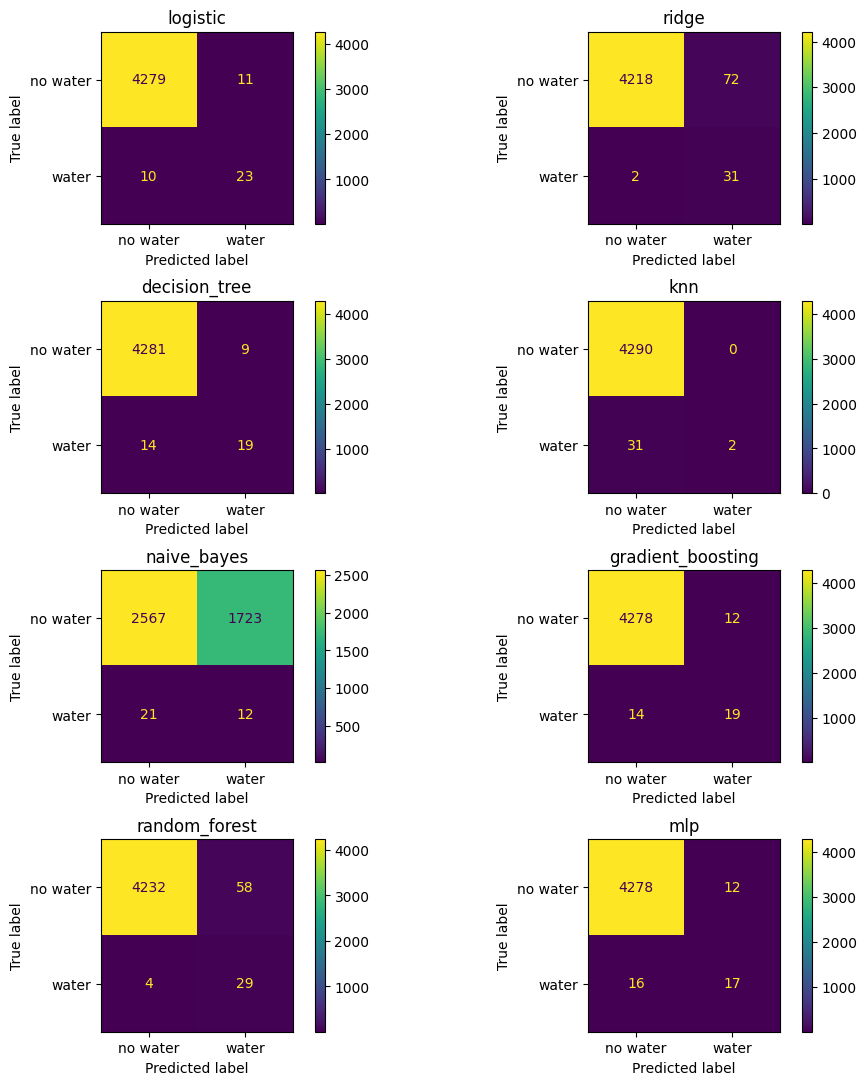

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["no water", "water"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [34]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [35]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [36]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [38]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["waterfront"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

c:\Users\ogoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'Error items count: 21'

date  Predicted      price  bedrooms  bathrooms  \
id                                                                       
121039042   20150313T000000          0   425000.0         3       2.75   
624069108   20140812T000000          0  3200000.0         4       3.25   
1025039086  20140916T000000          0  1875000.0         3       2.50   
1732800780  20150212T000000          1  3065000.0         5       3.00   
2122039094  20141126T000000          0   705000.0         3       3.00   
2923039243  20141113T000000          0   340000.0         4       1.00   
3024059014  20150325T000000          0  1900000.0         4       2.25   
3222049024  20140522T000000          1   361000.0         3       1.00   
3426049284  20140819T000000          0  2300000.0         4       3.25   
3741600020  20140915T000000          1   540000.0         3       2.25   
3760500336  20141126T000000          1  2125000.0         4       2.75   
3867400175  20150224T000000          1   850000.0         2       1.50   
6329000050  20150310T000000          0   641500.0         1       1.00   
6762700020  20141013T000000          1  7700000.0         6       8.00   
7278100515  20140821T000000          0  1295000.0         2       2.50   
7490000040  20140718T000000          1  2535000.0         5       3.25   
7631200292  20140626T000000          1   669000.0         2       1.75   
7636800041  20140625T000000          0   995000.0         3       4.50   
8907500070  20150413T000000          1  5350000.0         5       5.00   
8964800890  20150109T000000          1  3200000.0         3       3.25   
9208900037  20140919T000000          1  6885000.0         6       7.75   

            sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
id                                                           ...          
121039042          3610    107386     1.5           1     3  ...      8   
624069108          7000     28206     1.0           1     4  ...     12   
1025039086         3280     29111     2.0           1     3  ...     11   
1732800780         4150      7500     2.5           0     4  ...     11   
2122039094         1970     20978     2.0           1     3  ...      9   
2923039243         1200     11834     1.0           1     3  ...      6   
3024059014         3020     11489     1.5           1     3  ...     10   
3222049024         1100      4046     1.5           0     4  ...      6   
3426049284         4110     15929     2.0           1     4  ...     12   
3741600020         2100     20018     1.0           0     4  ...      8   
3760500336         3190     19513     2.0           0     4  ...     10   
3867400175         1800      4144     1.0           0     4  ...      7   
6329000050         1000      9084     1.0           1     3  ...      7   
6762700020        12050     27600     2.5           0     3  ...     13   
7278100515         2910     19449     2.0           1     4  ...      9   
7490000040         3730     10626     1.0           0     4  ...     10   
7631200292         1950     10766     1.0           0     3  ...      6   
7636800041         4380     47044     2.0           1     3  ...      9   
8907500070         8000     23985     2.0           0     4  ...     12   
8964800890         4560     13363     1.0           0     4  ...     11   
9208900037         9890     31374     2.0           0     4  ...     13   

            sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
id                                                                       
121039042         3130            480      1918          1962    98023   
624069108         3500           3500      1991             0    98075   
1025039086        3280              0      1925             0    98199   
1732800780        3510            640      1909             0    98119   
2122039094        1770            200      1980             0    98070   
2923039243        1200              0      1972             0    98070   
30

#### Пример использования обученной модели (конвейера) для предсказания

In [44]:
model = class_models[best_model]["pipeline"]

example_id = 624069108
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

date      price bedrooms bathrooms sqft_living sqft_lot  \
624069108  20140812T000000  3200000.0        4      3.25        7000    28206   

          floors waterfront view condition grade sqft_above sqft_basement  \
624069108    1.0          1    4         4    12       3500          3500   

          yr_built yr_renovated zipcode      lat     long sqft_living15  \
624069108     1991            0   98075  47.5928 -122.086          4913   

          sqft_lot15  
624069108      14663

Region_north  House_age     price  bedrooms  bathrooms  \
624069108           1.0       33.0  7.494206    0.6818   1.479217   

           sqft_living  sqft_lot    floors      view  condition  ...  \
624069108     5.372072   0.29821 -0.918509  4.922704   0.909775  ...   

           date_20150506T000000  date_20150507T000000  date_20150508T000000  \
624069108                   0.0                   0.0                   0.0   

           date_20150509T000000  date_20150510T000000  date_20150511T000000  \
624069108                   0.0                   0.0                   0.0   

           date_20150512T000000  date_20150513T000000  date_20150514T000000  \
624069108                   0.0                   0.0                   0.0   

           date_20150515T000000  
624069108                   0.0  

[1 rows x 384 columns]

'predicted: 0 (proba: [0.8437713 0.1562287])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
    "model__max_features": ["sqrt", "log2", 2],
    "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10],
    "model__criterion": ["gini", "entropy", "log_loss"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

Обучение модели с новыми гиперпараметрами

In [90]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=7,
    max_features="sqrt",
    n_estimators=30,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [98]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [99]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [100]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

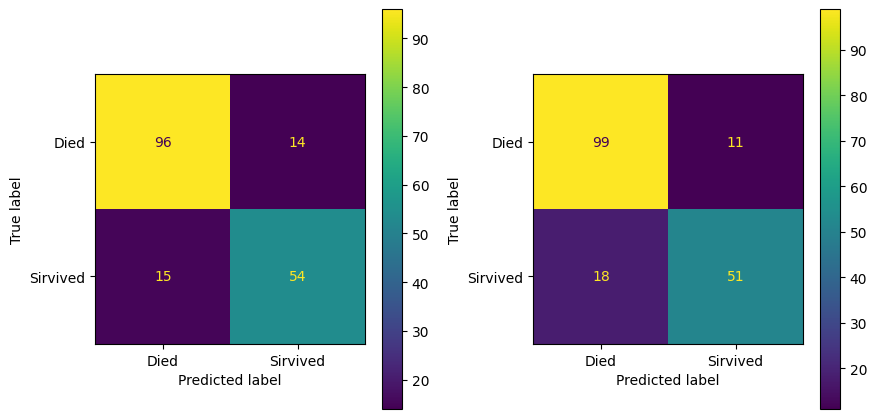

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["no water", "water"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()